# Strips Dataset
Script to genenerate a dataset composed of idenitified strips/patches of 256pp from the images from the original socrates dataset.


### Dataset structure:

* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* ...

The Train/Val/Test split will be done afterwards by assigning student id's to each set.

In [3]:
!ls

Dockerfile		       process.ipynb
README.md		       siamese_experiments.ipynb
SensorIdentification	       siamese_model-Copy1.ipynb
bibliography.bib	       siamese_model-Copy2.ipynb
checkPts		       siamese_model-Copy3.ipynb
cmi_deeplearning_experiments   siamese_model.ipynb
generate_strips.ipynb	       siamese_model_final.ipynb
get_characteristic_test.ipynb  siamese_new_dataset.ipynb
logs


In [4]:
ori_datadir = "/home/data/socrates/"
out_datadir = "/home/data/strips_socrates"

In [5]:
import os
import cv2 
import numpy as np
import glob
import matplotlib.pyplot as plt

In [ ]:
test = np.zeros((899, 1456, 3))
value = 0
for ystrip in range(0, 899, 100):
    for xstrip in range(0, 1456, 100):
        test[ystrip:ystrip+100, xstrip:xstrip+100, :] = (value % 255) / 255
        value += 2
plt.imshow(test)
    

In [ ]:
h = 899
w = 1456
num_vstrips = h // 256
num_hstrips = w // 256
strips = []
for x in range(num_hstrips):
    x0 = x * 256
    x1 = x0 + 256
    for y in range(num_vstrips):
        y0 = y * 256
        y1 = y0 + 256
        strip = test[y0:y1, x0:x1, :]
        strips.append(((x0,y0), strip))
for strip in strips:
    plt.figure()
    plt.suptitle(str(strip[0]))
    plt.imshow(strip[1])

In [ ]:
procssd = 0
for img_file in os.scandir(ori_datadir):
    procssd += 1
    if procssd % 100 == 0:
        print(procssd)
    student_id = img_file.name.split('_')[1]
    if not (img_file.path.endswith('.JPG') or img_file.path.endswith('.jpg')):
        print("Bad filetype: ", img_file.name)
        continue
    student_id = img_file.name.split('_')[1]
    outdir = os.path.join(out_datadir, student_id)
    try:
        os.mkdir(outdir)
    except OSError as error:
        if (error.errno == 17):
            pass
        else:
            print(error)
            print(error.errno)
    wimg = cv2.imread(img_file.path) 
    height, width, channels = wimg.shape
    num_vstrips = height // 256
    num_hstrips = width // 256
    for x in range(num_hstrips):
        x0 = x * 256
        x1 = x0 + 256
        for y in range(num_vstrips):
            y0 = y * 256
            y1 = y0 + 256
            strip = wimg[y0:y1, x0:x1, :]
            or_name = img_file.name.split('.')[0]
            strip_name = or_name + "_" + str(x0) + "_" + str(y0) + ".PNG"
            cv2.imwrite(os.path.join(outdir, strip_name), strip)

### Info file

In [1]:
import json

In [24]:
dataset = []
os.remove(os.path.join(out_datadir, 'dataset_info.json'))
for student_id in os.scandir(out_datadir):
    if student_id.name[0] == '.':
        continue
    img_strips = {}
    for img in os.scandir(student_id):
        if img.name[0] == '.':
            continue
        o_img_name = ('_').join(img.name.split('_')[0:4])
        if o_img_name not in img_strips:
            img_strips[o_img_name] = [img.path]
        else:
            img_strips[o_img_name].append(img.path)
    for l in img_strips.values():
        l.sort()
    img_strips_l = [(k, v) for k, v in img_strips.items()] 
    img_strips_l.sort()
    dataset.append(img_strips_l)

In [25]:
strips = 0
images = 0
min_strips = 99999
min_images = 99999

for s in dataset:
    images += len(s)
    if len(s) < min_images:
        min_images = len(s)
    for i in s:
        strips += len(i[1])
        if len(i) < min_strips:
            min_strips = len(i)
print(images, strips, min_images, min_strips)

1875 227947 89 2


In [26]:
len(dataset)

20

# THERE are some devices that have images of different sizes!!
check where and delete. There was only one, so manually deleted. For future report it was eurecom_104_picFG_0_30

In [27]:
strips_std = []
for i, std in enumerate(dataset):
    nstrips = len(std[0][1])
    for im in std:
        if len(im[1]) > nstrips:
            nstrips = len(im[1])
    nstripsi = [std[0][0], f"Images: {len(std)}", f"strips: {nstrips}"]
    new_std = []
    for im in std:
        if len(im[1]) != nstrips:
            #print(im[0])
            pass
        else:
            new_std.append(im)
    dataset[i] = new_std
    strips_std.append(nstripsi)

In [31]:
for std in dataset:
    #print(std[0], len(std))
    if len(std) < 10:
        print(std)
        dataset.remove(std)

In [32]:
strips_std

[['Eurecom_173_picBG_001', 'Images: 100', 'strips: 270'],
 ['Eurecom_152_picBG_001', 'Images: 90', 'strips: 60'],
 ['Eurecom_124_picBG_001', 'Images: 90', 'strips: 10'],
 ['Eurecom_127_picBG_001', 'Images: 90', 'strips: 120'],
 ['Eurecom_103_picBG_001', 'Images: 90', 'strips: 108'],
 ['Eurecom_172_picBG_001', 'Images: 100', 'strips: 165'],
 ['Eurecom_154_picBG_001', 'Images: 89', 'strips: 8'],
 ['Eurecom_123_picBG_001', 'Images: 96', 'strips: 220'],
 ['Eurecom_140_picBG_001', 'Images: 90', 'strips: 144'],
 ['Eurecom_128_picBG_001', 'Images: 90', 'strips: 165'],
 ['Eurecom_176_picBG_001', 'Images: 100', 'strips: 120'],
 ['Eurecom_187_picBG_001', 'Images: 100', 'strips: 165'],
 ['Eurecom_224_picBG_001', 'Images: 100', 'strips: 48'],
 ['Eurecom_125_picBG_001', 'Images: 90', 'strips: 144'],
 ['Eurecom_160_picBG_001', 'Images: 90', 'strips: 192'],
 ['Eurecom_213_picBG_001', 'Images: 100', 'strips: 50'],
 ['Eurecom_130_picBG_001', 'Images: 90', 'strips: 144'],
 ['Eurecom_149_picBG_001', 'Ima

In [33]:
with open(os.path.join(out_datadir, 'dataset_info.json'), 'w') as f:
    json.dump(dataset, f)

In [52]:
with open(os.path.join(out_datadir, 'dataset_info.json')) as f:
    dataset = json.load(f)

###  Visualize some images to ensure correct dataset shape

In [22]:
dataset[0][0]

('Eurecom_184_picBG_001',
 ['/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_0.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_1024.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_1280.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_1536.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_1792.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_2048.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_2304.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_256.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_512.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_0_768.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_1024_0.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_1024_1024.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_1024_1280.PNG',
  '/home/data/strips_socrates/184/Eurecom_184_picBG_001_1024_1536.PNG',
  '/h

/home/data/strips_socrates/184/Eurecom_184_picFG_011


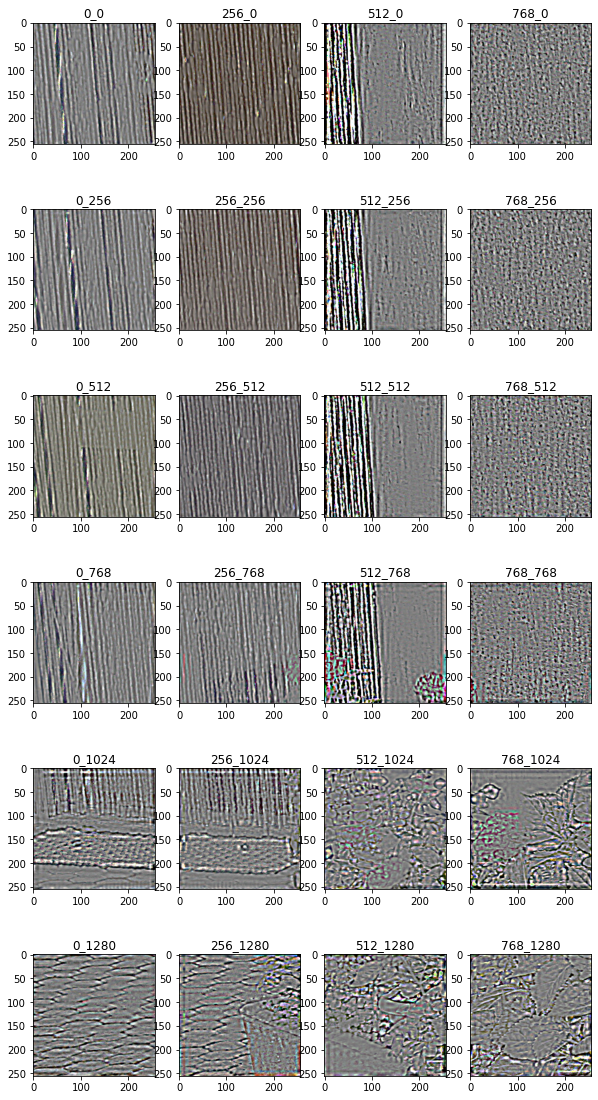

In [23]:
test_s = dataset[0]
test_img = test_s[60][1]
base_name = ('_').join(test_img[0].split('_')[0:5])
print(base_name)
plt.figure(figsize=(10,20))
for y in range(0, 6):
    for x in range(0,4):
        strip = cv2.imread(f'{base_name}_{x*256}_{y*256}.PNG')
        ax = plt.subplot(6, 4, (y*4+x)+1)
        ax.imshow(strip[:,:,::-1])
        ax.set_title(f'{x*256}_{y*256}')
plt.show()